# Понижение размерности


Из методички

In [695]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**PCA на сгенерированных данных**

Метод главных компонент (PCA) — самый популярный способ понижения размерности. Он выделяет наиболее информативные направления в данных. Лучше всего его смысл виден на примерах с высокой корреляцией признаков.

Сгенерируем такой набор признаков, для наглядности, двумерный:

In [696]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

<Axes: >

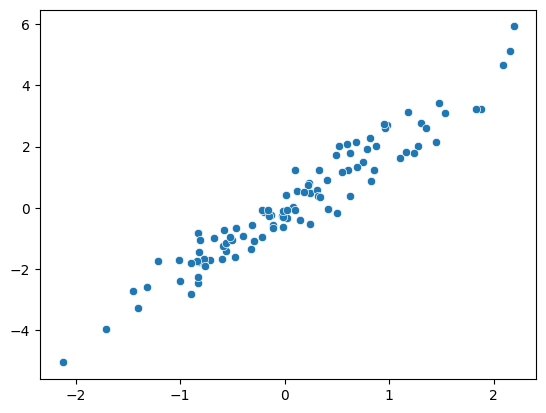

In [697]:
sns.scatterplot(x=x, y=y)

Попробуем применить метод понижения размерности сразу, на данных как есть. Для этого импортируем класс данного метода из пакета decomposition:

In [698]:
from sklearn.decomposition import PCA

Теперь мы создаем экземпляр класса. В конструкторе класса указываем количество компонент, которые хотим оставить в данных. Так как у нас всего два измерения, придется оставлять только одно:

In [699]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

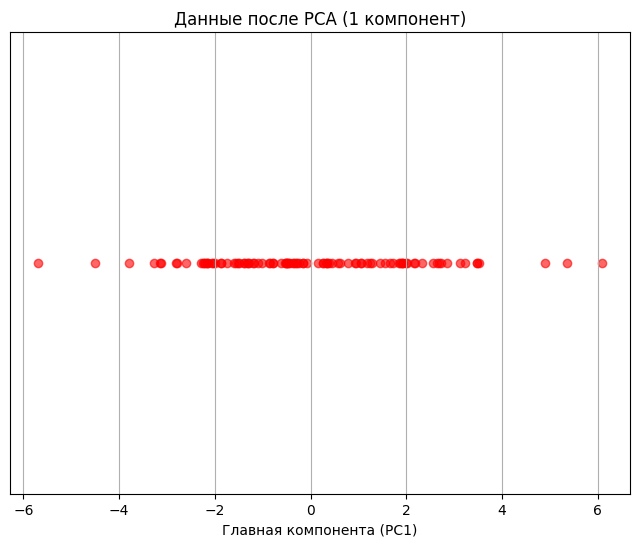

In [700]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca, np.zeros_like(X_pca), color='red', alpha=0.6)  # Отложение по оси X, Y = 0
plt.title('Данные после PCA (1 компонент)')
plt.xlabel('Главная компонента (PC1)')
plt.yticks([])  # Убираем метки по оси Y
plt.grid()
plt.show()

Это распределение, по сути, представляет собой проекцию исходного множества точек на определенную прямую. Эта прямая представляет собой направление, вдоль которого дисперсия исходного распределения максимальна. Этот вектор (направление) как раз и представляет собой главную компоненту.

Информацию о главной компоненте можно получить в соответствующих свойствах обученного объекта:

In [701]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.4041561  0.91469003]]
Объясненная дисперсия: [0.98990244]


Первое свойство хранит набор векторов главных компонент. Так как в нашем случае мы оставили только одно измерение, и главная компонента тоже будет одна. Это двумерный вектор, который и представляет собой направление в исходном пространстве.

Второй список хранит доли объясненной дисперсии по главным компонентам. Тут у нас опять только одно значение. Оно значит, что понижение размерности с двух до одного измерения сохраняет 98% исходной дисперсии выборки.


В нашем случае двумерных данных можно очень наглядно визуализировать главную компоненту в исходном распределении. Можно изобразить вектор этого направления на диаграмме рассеяния. Этот код визуализирует вектор, имеющий начало в начале координат и направление, совпадающее с главной компонентой.

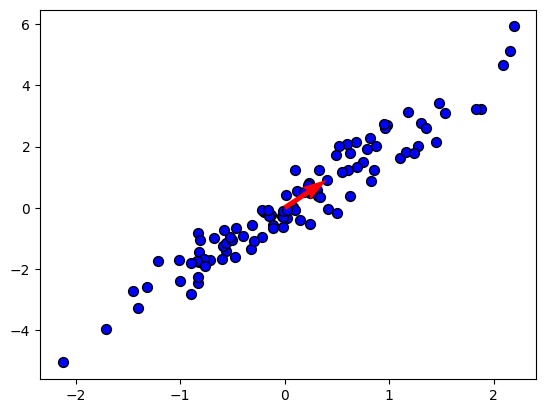

In [702]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

Посмотрим, как нормировка данных влияет на результат. Воспользуемся уже известным методом стандартизации:

In [703]:
from sklearn.preprocessing import StandardScaler

In [704]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Теперь воспользуемся тем же методом понижения размерности, но уже обучим его на масштабированных данных:

In [705]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

Так как решкалирование в целом сохраняет внутренние структуры, то есть расстояния между точками, это не влияет на результат понижения размерности (за исключением масштаба данных):

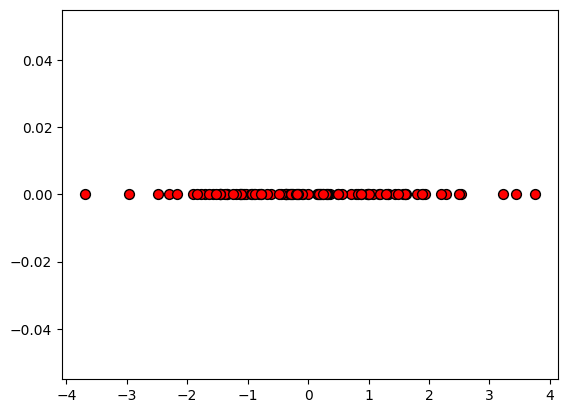

In [706]:
plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

**PCA на многомерных данных**

По аналогии проследим работу того же алгоритма, но уже на данных, состоящих из большего количества измерений. Для примера возьмем встроенный датасет о диагностике рака:

In [707]:
from sklearn.datasets import load_breast_cancer

In [708]:
data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

Теперь применим метод главных компонент. Сейчас выберем уже две главные компоненты. В таком случае результат можно будет визуализировать.

In [709]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [710]:
pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

In [711]:
df_temp = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

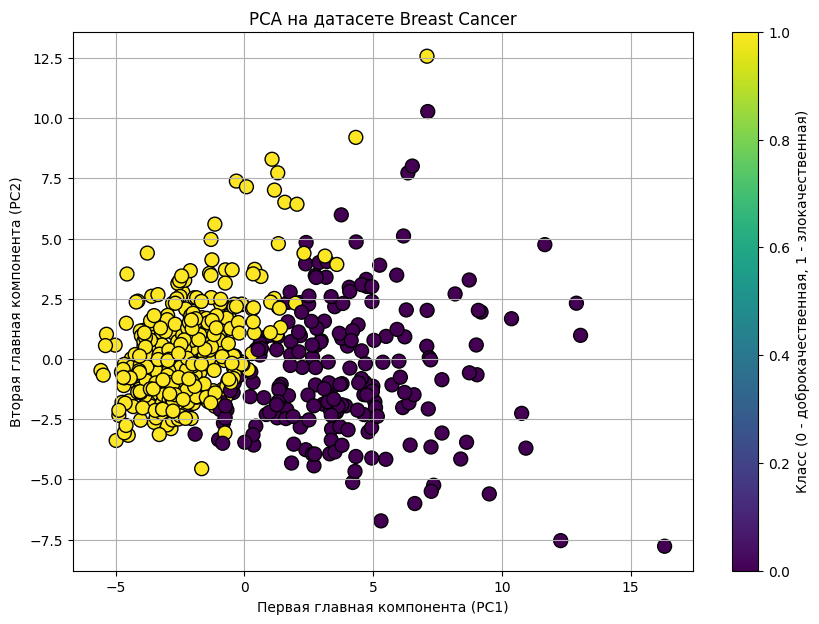

In [712]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_temp['PC1'], df_temp['PC2'], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA на датасете Breast Cancer')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.colorbar(scatter, label='Класс (0 - доброкачественная, 1 - злокачественная)')
plt.grid()
plt.show()

Мы здесь видим, по сути, проекцию набора точек из тридцатимерного пространства на плоскость. Причем эта плоскость расположена внутри этого тридцатимерного пространства таким образом, чтобы сохранить максимальную дисперсию. Другими словами, эта плоскость расположена так, чтобы в проекции точки были максимально разбросаны.

In [713]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Давайте посмотрим, какую именно часть выборочной дисперсии мы сохранили после понижения размерности:

In [714]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


**Метод локтя для PCA**

Метод понижения размерности полезен не только для визуализации, но и для уменьшения числа признаков с минимальной потерей информации. Оптимальное число компонент определяют по графику зависимости накопленной дисперсии от количества компонент.

Для этого построим алгоритм главных компонент с количеством компонент от 1 до 30:

In [715]:
n_components_range = range(1, 31)
explained_variance = []

Для каждого количества обучим и оценим соответствующую модель и запомним процент объясненной дисперсии:

In [716]:
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

Мы получаем такую характерную картину:

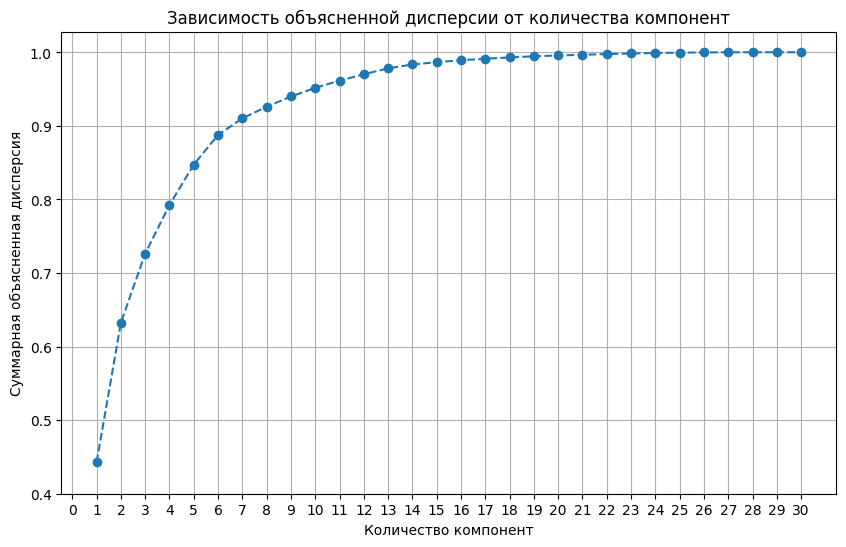

In [717]:
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variance, marker='o', linestyle='--')
plt.title('Зависимость объясненной дисперсии от количества компонент')
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объясненная дисперсия')
plt.grid()
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(0.4, 1.1, 0.1))
plt.show()

Первая компонента объясняет 44% дисперсии, вторая — существенно больше, затем прирост снижается. Оптимальное число компонент определяют по "локтю" на графике — в нашем случае это около 6–7, после чего прирост информации становится незначительным.

In [718]:
pca = PCA(n_components=15)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783]
Суммарная объясненная дисперсия: 0.99


In [719]:
df_temp_1 = pd.DataFrame(data=X_pca)

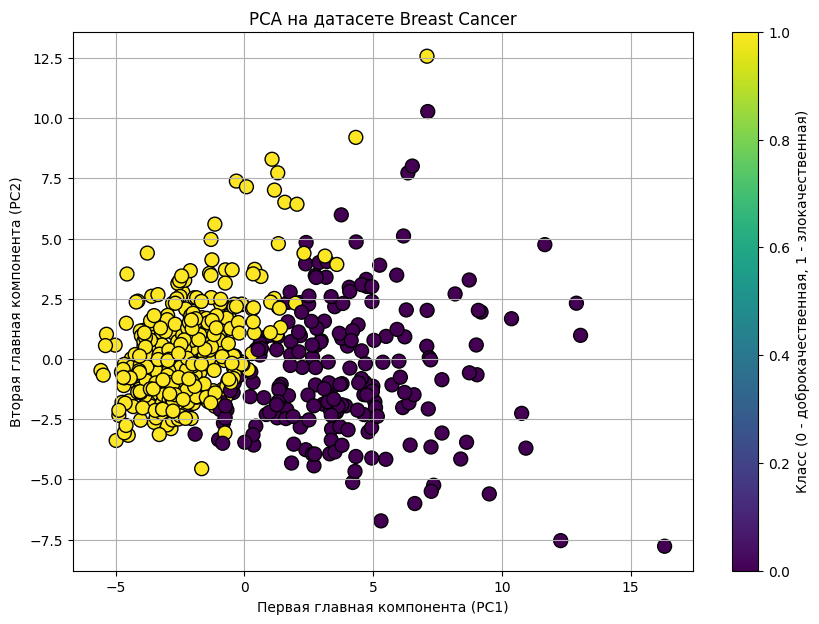

In [720]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_temp_1[0], df_temp_1[1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA на датасете Breast Cancer')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.colorbar(scatter, label='Класс (0 - доброкачественная, 1 - злокачественная)')
plt.grid()
plt.show()

Первые компоненты в PCA не зависят от заданного их количества — метод всегда находит одни и те же направления. Количество компонент лишь ограничивает, сколько из них сохраняется. Поэтому первые две компоненты модели с 7 измерениями будут такими же, как и в модели с 2.

**Метод LDA**

Метод главных компонент (PCA) учитывает только взаимное расположение точек и может сблизить разные классы при проекции, что затрудняет классификацию. Линейный дискриминантный анализ (LDA) решает эту проблему — он учитывает метки классов и ищет проекции, которые максимально разделяют их.

LDA принимает во внимание значение целевой переменной. И выбирает направления проекции таким образом, чтобы максимизировать расстояние между классами. Рассмотрим, например, такой датасет:

In [721]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

Это двумерный набор искусственных данных для классификации. Вот как он выглядит вместе с информацией о классах:

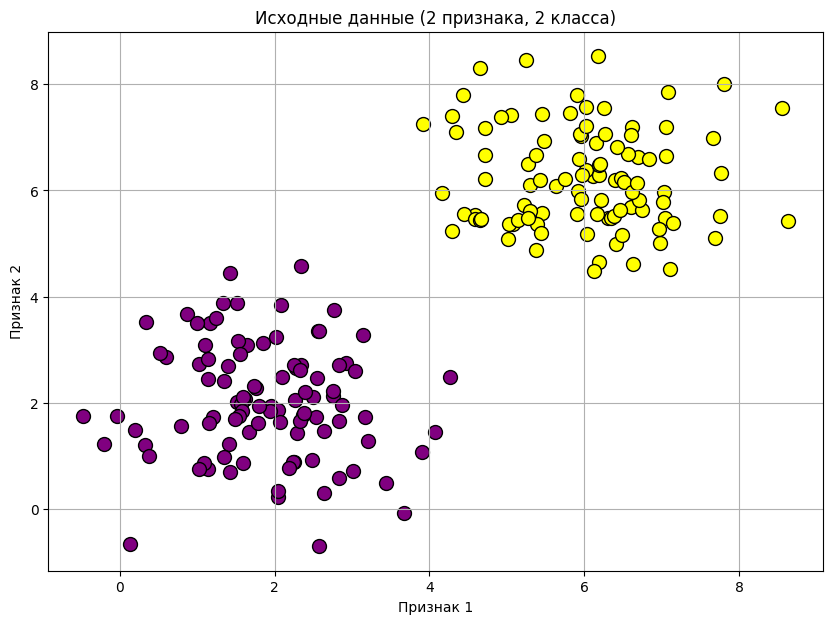

In [722]:
plt.figure(figsize=(10, 7))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='purple', edgecolor='k', s=100)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='yellow', edgecolor='k', s=100)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Исходные данные (2 признака, 2 класса)')
plt.grid(True)
plt.show()

Легко представить себе, что проецируя это распределение вдоль некоторых направлений, изначально очень разделимые классы могут полностью перемешаться. Посмотрим, как этому препятствует метод LDA. Интерфейс у класса этого метода, конечно, точно такой же, как и у предыдущего:

In [723]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [724]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [725]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

На рисунке в проекции это выглядит так (обратите внимание, что классы остались линейно разделимыми):

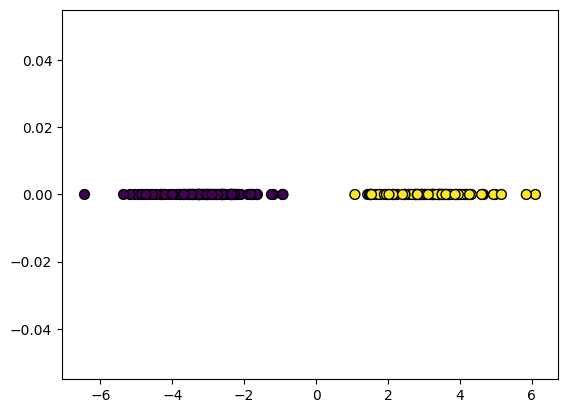

In [726]:
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, edgecolor='k', s=50)

In [727]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[11.12668308 10.52447039]]


**Метод LDA для анизатропных классов**

In [728]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

Понижение размерности методом главных компонент, несомненно, сохраняет гарантированно больше информации от исходного распределения. Но если применять его в качестве предварительного этапа обработки данных перед классификацией, то пользы от метода линейного дискриминантного анализа может быть значительно больше.

**Метод t-SNE**

Рассмотрим еще один интересный метод понижения размерности - t-SNE. Он часто используется для визуализации кластеров - то есть близких групп точек в наборе данных. Давайте рассмотрим механизм его действия на примере уже использованного нами датасета для классификации.

In [729]:
from sklearn.manifold import TSNE

In [730]:
tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

Мы видим два различных кластера точек, которые соответствуют двум исходным классам в датасете.

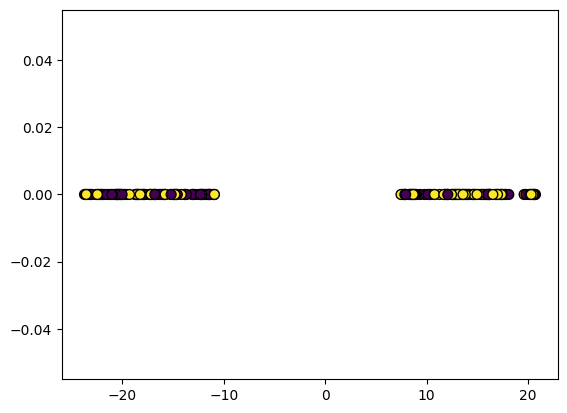

In [731]:
plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, edgecolor='k', s=50)

Алгоритм t-SNE не использует метки классов — он выявляет группы по схожести точек. Попробуйте применить его к анизотропному датасету. Важный гиперпараметр — perplexity, он определяет, будут ли лучше видны крупные или мелкие структуры. Рекомендуемый диапазон значений — от 5 до 50, стоит протестировать разные варианты на практике.

In [732]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Теперь обучим для каждого значения соответствующий алгоритм и визуализируем его результаты:

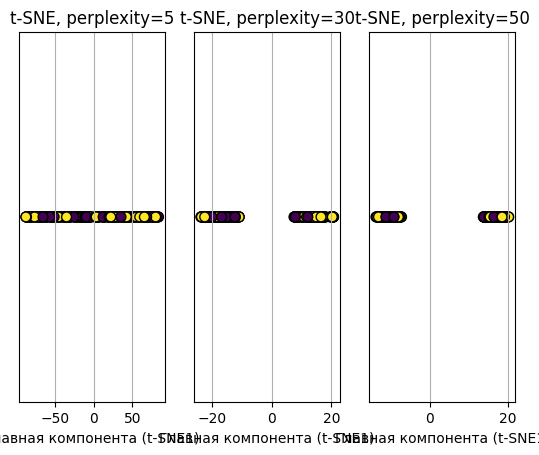

In [733]:
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

**Kernel PCA для нелинейных данных**

In [734]:
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

Давайте посмотрим датасет с линейно неразделимыми классами.

In [735]:
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

Это довольно часто используемый искусственный датасет с ярко выраженной нелинейностью:

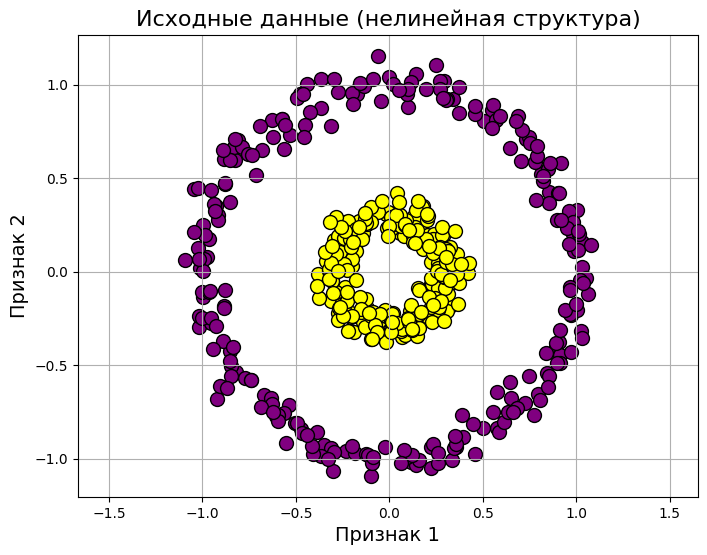

In [736]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='purple', edgecolor='k', s=100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='yellow', edgecolor='k', s=100)
plt.title('Исходные данные (нелинейная структура)', fontsize=16)
plt.xlabel('Признак 1', fontsize=14)
plt.ylabel('Признак 2', fontsize=14)
plt.axis('equal')
plt.grid()
plt.show()

# Задания для самостоятельного выполнения

*1. Попробуйте изменить уровень шума в данных (например, увеличить или уменьшить шум в y) и посмотрите, как это влияет на результат PCA.*

In [737]:
n_samples = 100
x = np.random.normal(0, 1, n_samples) # первый признак - нормальное распределение
y_low_noise = 2 * x + np.random.normal(0, 0.2, n_samples) # второй признак - линейно зависим от первого + малый шум
y_high_noise = 2 * x + np.random.normal(0, 2, n_samples) # второй признак - линейно зависим от первого + высокий шум

In [738]:
X_low_noise = np.column_stack((x, y_low_noise)) # признаки в матрицу
X_high_noise = np.column_stack((x, y_high_noise))

In [739]:
pca = PCA(n_components=1)
X_pca_low = pca.fit_transform(X_low_noise)
X_pca_high = pca.fit_transform(X_high_noise)

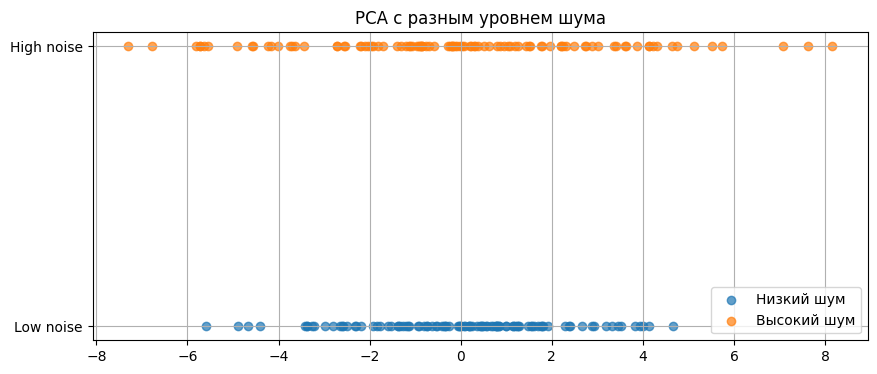

In [740]:
plt.figure(figsize=(10, 4))
plt.scatter(X_pca_low, np.zeros_like(X_pca_low), label="Низкий шум", alpha=0.7)
plt.scatter(X_pca_high, np.ones_like(X_pca_high), label="Высокий шум", alpha=0.7)
plt.yticks([0, 1], ['Low noise', 'High noise'])
plt.title("PCA с разным уровнем шума")
plt.legend()
plt.grid(True)
plt.show()

При низком шуме точки кластеров более компактные и лучше разделены, что говорит о четкой структуре данных. Высокий шум приводит к размытию кластеров и ухудшению их различимости, что усложняет интерпретацию. Это подтверждает, что PCA эффективнее работает на данных с низким уровнем шума.

*2. Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.*

In [741]:
x = np.random.normal(0, 1, n_samples) # первый признак
y = 2 * x + np.random.normal(0, 0.2, n_samples) # второй признак - зависит от x с небольшим шумом
z = x + y + np.random.normal(0, 0.2, n_samples) # третий признак — зависит от x и y, тоже с небольшим шумом

# объединяем в матрицу признаков
X = np.column_stack((x, y, z))

In [742]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

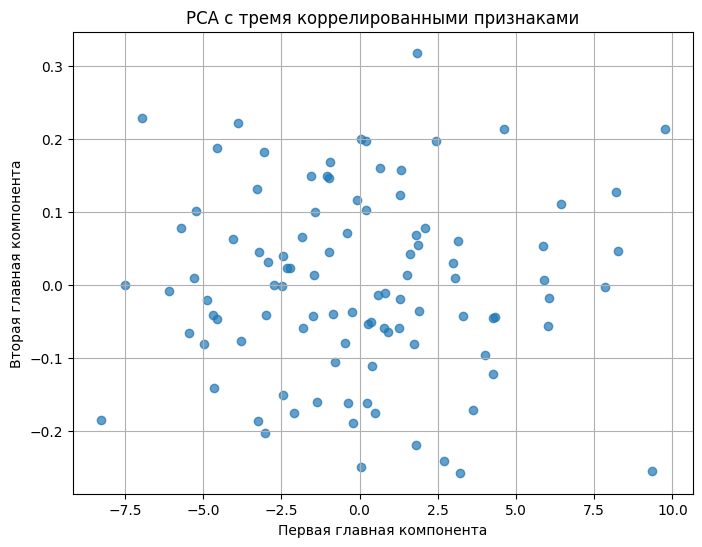

In [743]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title("PCA с тремя коррелированными признаками")
plt.grid(True)
plt.show()

Признаки тесно связаны: когда один растёт, другие тоже растут, и наоборот. PCA выявил это, показав, что вся информация умещается в одной главной компоненте — остальные почти не влияют. По сути, признаки дублируют друг друга, и можно оставить лишь один без потери данных.

*3. Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.*


In [744]:
n_samples = 100  # кол-во объектов в каждом классе

# классы далеко
x1 = np.random.normal(2, 1, n_samples)  # класс 0 - координата x, центр около 2, с отклонением 1
y1 = np.random.normal(2, 1, n_samples)  # класс 0 - координата y
x2 = np.random.normal(6, 1, n_samples)  # класс 1 - координата x, центр около 6, с отклонением 1
y2 = np.random.normal(6, 1, n_samples)  # класс 1 - координата y

# объединяем в один массив данных для LDA
X_far = np.vstack((
    np.column_stack((x1, y1)),
    np.column_stack((x2, y2))
))

# метки классов
y = np.hstack((
    np.zeros(n_samples),
    np.ones(n_samples)
))

scaler = StandardScaler()
X_far_scaled = scaler.fit_transform(X_far)

# создаем объект LDA для снижения размерности с 2D до 1D
lda = LDA(n_components=1)

X_lda_far = lda.fit_transform(X_far_scaled, y)

In [745]:
# классы близко
x1_close = np.random.normal(2, 1, n_samples)
y1_close = np.random.normal(2, 1, n_samples)
x2_close = np.random.normal(3, 1, n_samples)  # класс 1 ближе к классу 0 (центр около 3)
y2_close = np.random.normal(3, 1, n_samples)

X_close = np.vstack((
    np.column_stack((x1_close, y1_close)),
    np.column_stack((x2_close, y2_close))
))

X_close_scaled = scaler.fit_transform(X_close)

X_lda_close = lda.fit_transform(X_close_scaled, y)

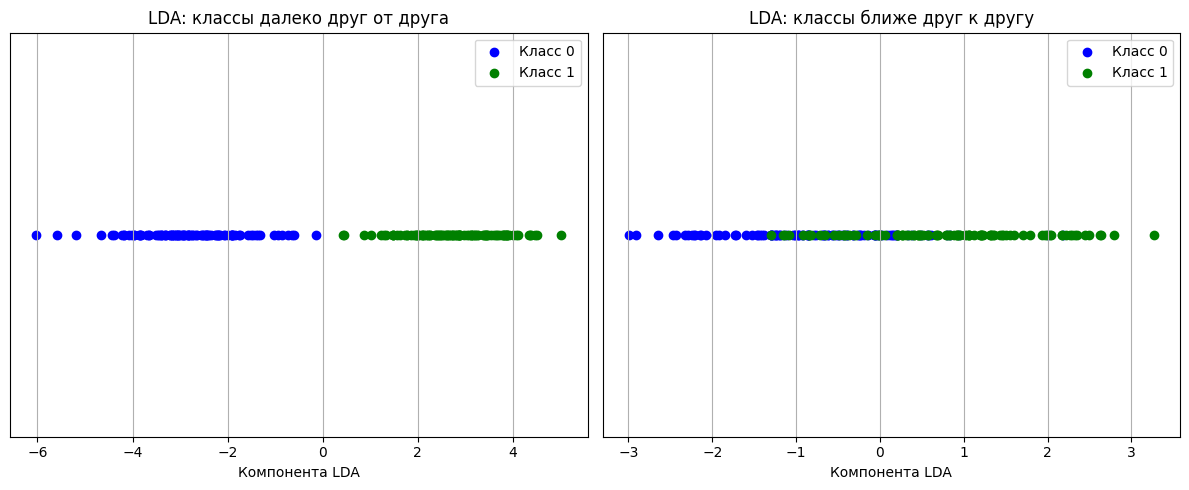

In [746]:
plt.figure(figsize=(12, 5))

# классы далеко
plt.subplot(1, 2, 1)
plt.scatter(X_lda_far[:n_samples], np.zeros(n_samples), c='blue', label='Класс 0')
plt.scatter(X_lda_far[n_samples:], np.zeros(n_samples), c='green', label='Класс 1')
plt.title('LDA: классы далеко друг от друга')
plt.xlabel('Компонента LDA')
plt.yticks([])
plt.legend()
plt.grid(True)

# классы близко
plt.subplot(1, 2, 2)
plt.scatter(X_lda_close[:n_samples], np.zeros(n_samples), c='blue', label='Класс 0')
plt.scatter(X_lda_close[n_samples:], np.zeros(n_samples), c='green', label='Класс 1')
plt.title('LDA: классы ближе друг к другу')
plt.xlabel('Компонента LDA')
plt.yticks([])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

На графике LDA показано, что классы либо хорошо разделены (далеко друг от друга), либо частично перекрываются (ближе друг к другу). Это означает, что метод успешно выделил признаки, которые различают классы, но в некоторых случаях данные могут быть менее различимыми из-за их схожести или шума. Чем дальше классы, тем лучше LDA справляется с их разделением.

*4. Добавьте третий класс и примените LDA с n_components=2.*

In [747]:
np.random.seed(42)  # чтобы результаты были воспроизводимыми

# три класса с разными центрами и разбросами
X1 = np.random.normal(loc=[0, 0], scale=1.0, size=(50, 2))
X2 = np.random.normal(loc=[5, 5], scale=1.5, size=(50, 2))
X3 = np.random.normal(loc=[2, 7], scale=0.8, size=(50, 2))

X = np.vstack((X1, X2, X3))
y = np.array([0]*50 + [1]*50 + [2]*50)

In [748]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

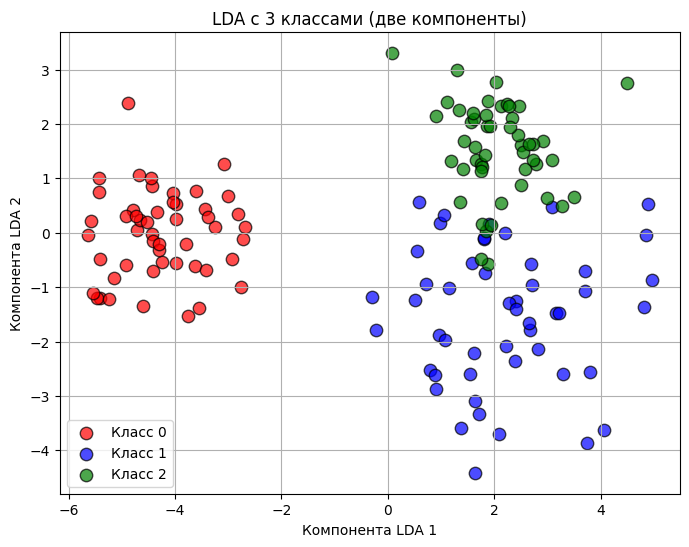

In [749]:
plt.figure(figsize=(8,6))

colors = ['red', 'blue', 'green']
labels = ['Класс 0', 'Класс 1', 'Класс 2']

for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], c=color, label=label, edgecolor='k', alpha=0.7, s=80)

plt.title("LDA с 3 классами (две компоненты)")
plt.xlabel("Компонента LDA 1")
plt.ylabel("Компонента LDA 2")
plt.legend()
plt.grid(True)
plt.show()

LDA успешно разделил 3 класса вдоль двух компонент: классы четко разнесены по горизонтали (LDA 1) и вертикали (LDA 2), что показывает хорошую различимость данных. Это означает, что выбранные признаки эффективно выделяют уникальные особенности каждого класса.

*5. Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?*

In [750]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

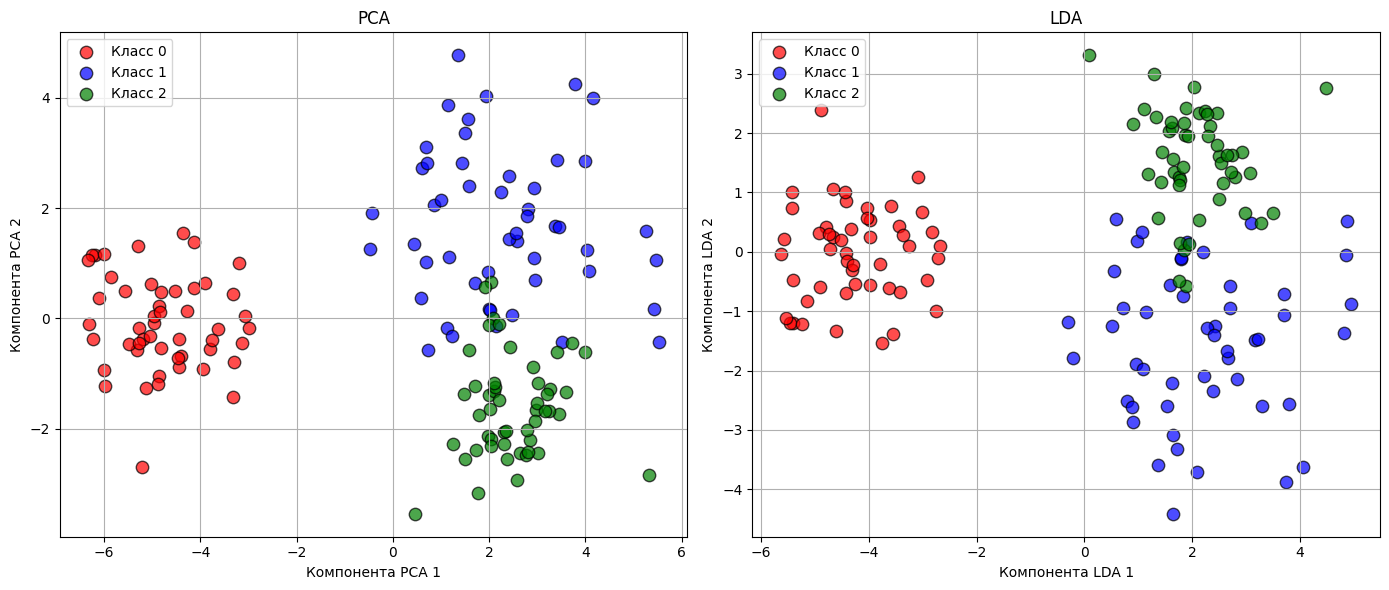

In [751]:
colors = ['red', 'blue', 'green']
labels = ['Класс 0', 'Класс 1', 'Класс 2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for i, color, label in zip([0,1,2], colors, labels):
    ax1.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, label=label, edgecolor='k', alpha=0.7, s=80)
ax1.set_title("PCA")
ax1.set_xlabel("Компонента PCA 1")
ax1.set_ylabel("Компонента PCA 2")
ax1.legend()
ax1.grid(True)

for i, color, label in zip([0,1,2], colors, labels):
    ax2.scatter(X_lda[y == i, 0], X_lda[y == i, 1], c=color, label=label, edgecolor='k', alpha=0.7, s=80)
ax2.set_title("LDA")
ax2.set_xlabel("Компонента LDA 1")
ax2.set_ylabel("Компонента LDA 2")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

PCA показывает слабое разделение классов (точки перемешаны), а LDA демонстрирует четкие кластеры вдоль компонент.


LDA лучше разделяет классы, так как специально оптимизирован для максимизации межклассового расстояния, в отличие от PCA, который лишь сокращает размерность без учёта меток классов.

LDA — для разделения, PCA — для сжатия данных. Здесь LDA справился лучше.

*6. Попробуйте изменить параметр degree для полиномиального ядра метода KernelPCA и посмотрите, как это влияет на результат.*

In [752]:
kpca_linear = KernelPCA(n_components=2, kernel='poly', degree=2)
X_kpca = kpca_linear.fit_transform(X)

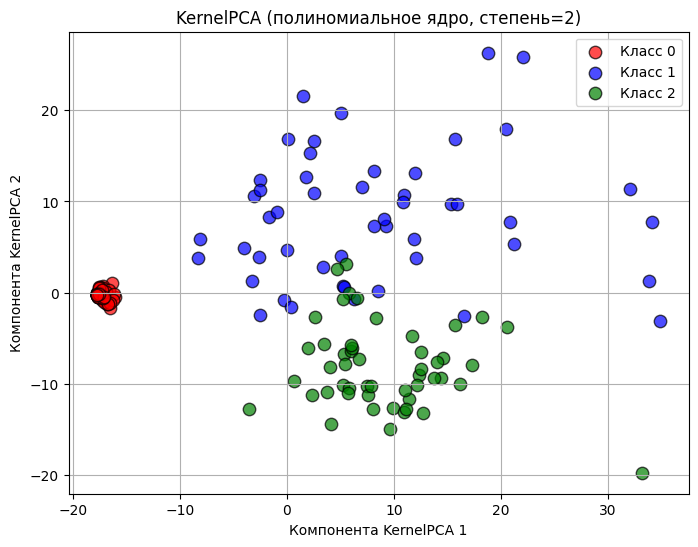

In [753]:
colors = ['red', 'blue', 'green']
labels = ['Класс 0', 'Класс 1', 'Класс 2']

plt.figure(figsize=(8,6))
for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(X_kpca[y == i, 0], X_kpca[y == i, 1], c=color, label=label, edgecolor='k', alpha=0.7, s=80)

plt.title("KernelPCA (полиномиальное ядро, степень=2)")
plt.xlabel("Компонента KernelPCA 1")
plt.ylabel("Компонента KernelPCA 2")
plt.legend()
plt.grid(True)
plt.show()


У нас никаких изменений нет, поскольку последние данные линейные.

*7. Примените все три изученных в этой работе метода к датасету для классификации по вашему выбору.*

In [754]:
from sklearn.datasets import load_iris

In [755]:
iris = load_iris()
X = iris.data
y = iris.target

In [756]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [757]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [758]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

In [759]:
kpca = KernelPCA(n_components=2, kernel='poly', degree=3, random_state=42)
X_kpca = kpca.fit_transform(X_scaled)

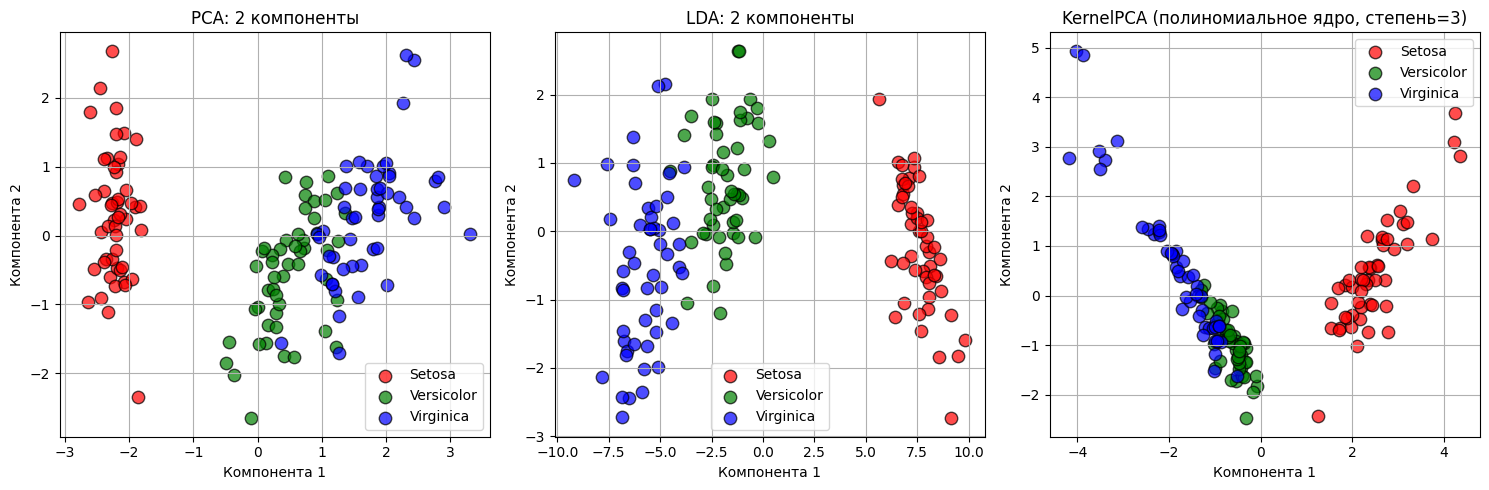

In [760]:
plt.figure(figsize=(15, 5))

colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']

# PCA
plt.subplot(1, 3, 1)
for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, label=label, edgecolor='k', s=80, alpha=0.7)
plt.title('PCA: 2 компоненты')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.grid(True)

# LDA
plt.subplot(1, 3, 2)
for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], c=color, label=label, edgecolor='k', s=80, alpha=0.7)
plt.title('LDA: 2 компоненты')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.grid(True)

# KernelPCA
plt.subplot(1, 3, 3)
for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X_kpca[y == i, 0], X_kpca[y == i, 1], c=color, label=label, edgecolor='k', s=80, alpha=0.7)
plt.title('KernelPCA (полиномиальное ядро, степень=3)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


LDA демонстрирует наилучшее разделение классов, так как его компоненты четко разграничивают группы. PCA и KernelPCA работают хуже.

*8. Исследуйте влияние аргумента perplexity на результат работы алгоритма на многомерных данных.*

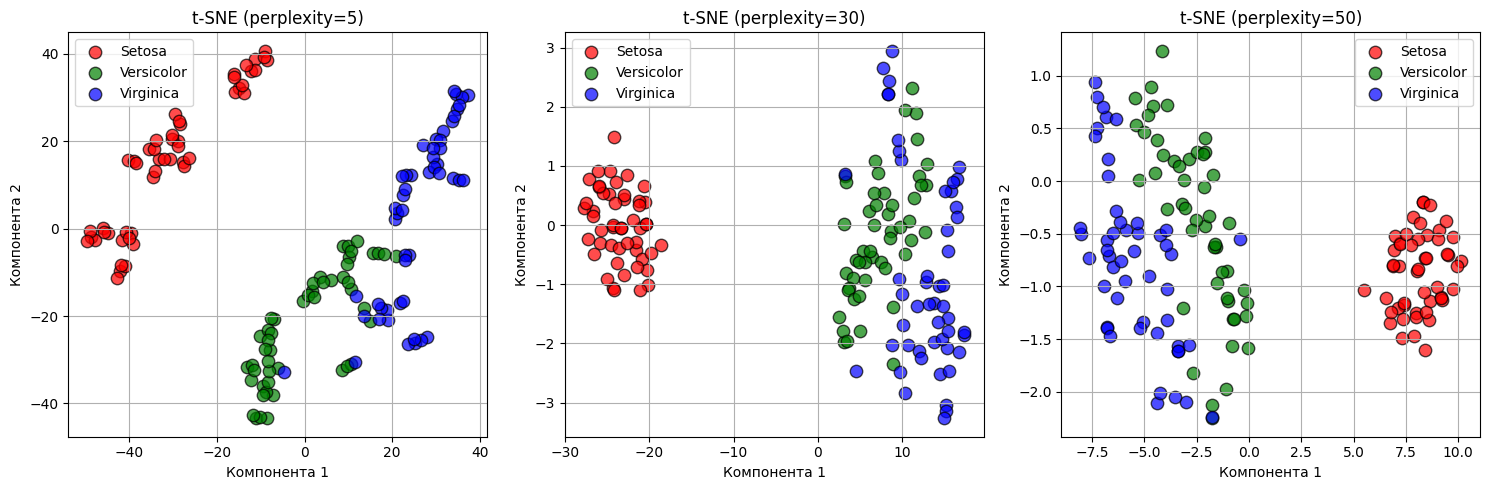

In [761]:
perplexities = [5, 30, 50]

plt.figure(figsize=(15, 5))

for i, perp in enumerate(perplexities, 1):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, len(perplexities), i)
    plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], c='red', label='Setosa', edgecolor='k', s=80, alpha=0.7)
    plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], c='green', label='Versicolor', edgecolor='k', s=80, alpha=0.7)
    plt.scatter(X_tsne[y == 2, 0], X_tsne[y == 2, 1], c='blue', label='Virginica', edgecolor='k', s=80, alpha=0.7)
    plt.title(f't-SNE (perplexity={perp})')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

t-SNE с разными значениями perplexity (5, 30, 50) показывает различную группировку классов (Setosa, Versicolor, Virginica). При perplexity=30 кластеры выглядят наиболее четко разделенными, тогда как при perplexity=5 и 50 наблюдается либо избыточная фрагментация, либо перекрытие кластеров.

Оптимальное качество визуализации достигается при perplexity=30, так как оно лучше всего сохраняет локальную и глобальную структуру данных.

t-SNE c perplexity=30 > perplexity=50 > perplexity=5. Умеренное значение параметра дает наилучшее разделение.

*9. Визуализируйте выбранный датасет при помощи разных методов понижения размерности.*

In [762]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

kpca = KernelPCA(n_components=2, kernel='poly', degree=3)
X_kpca = kpca.fit_transform(X_scaled)

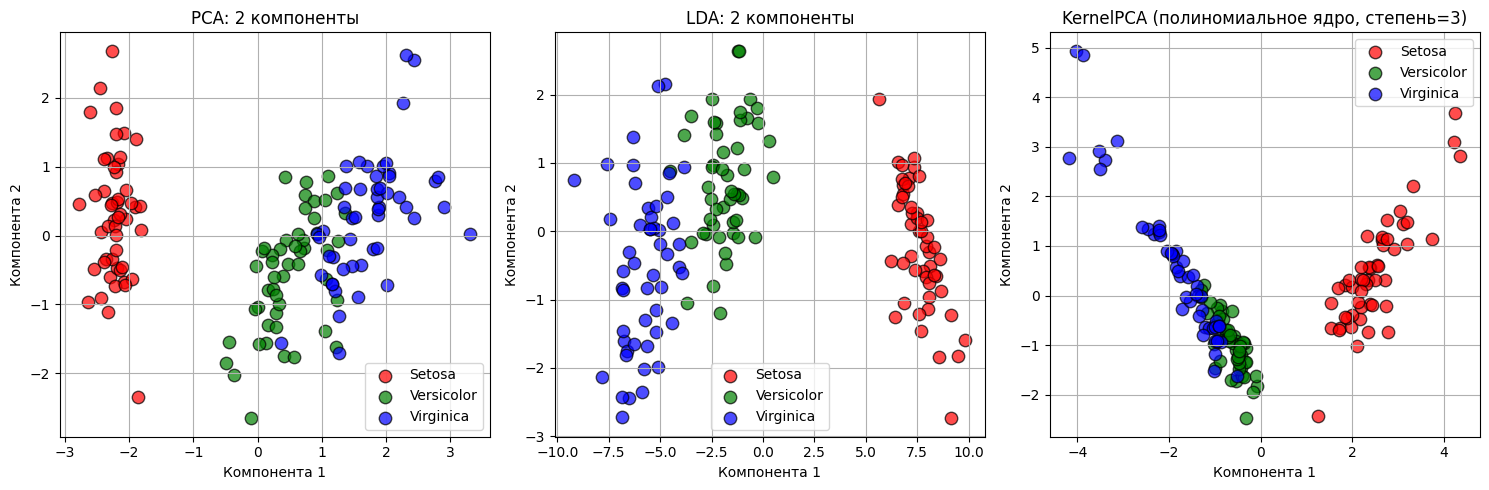

In [763]:
plt.figure(figsize=(15, 5))

colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']

# PCA
plt.subplot(1, 3, 1)
for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, label=label, edgecolor='k', s=80, alpha=0.7)
plt.title('PCA: 2 компоненты')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.grid(True)

# LDA
plt.subplot(1, 3, 2)
for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], c=color, label=label, edgecolor='k', s=80, alpha=0.7)
plt.title('LDA: 2 компоненты')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.grid(True)

# KernelPCA
plt.subplot(1, 3, 3)
for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(X_kpca[y == i, 0], X_kpca[y == i, 1], c=color, label=label, edgecolor='k', s=80, alpha=0.7)
plt.title('KernelPCA (полиномиальное ядро, степень=3)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

*10. Сравните все три алгоритма классификации по метрике доли объясненной дисперсии. Выберите для каждого метода оптимальное количество кластеров по методу локтя.*

In [764]:
from sklearn.cluster import KMeans

In [765]:
pca = PCA(n_components=4)  # 4 компоненты для explained variance
X_pca = pca.fit_transform(X_scaled)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

kpca = KernelPCA(n_components=4, kernel='poly', degree=3)
X_kpca = kpca.fit_transform(X_scaled)

In [766]:
print("Explained variance ratio PCA:", pca.explained_variance_ratio_)
print("Суммарная explained variance PCA:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio PCA: [0.72962445 0.22850762 0.03668922 0.00517871]
Суммарная explained variance PCA: 1.0000000000000002


In [767]:
def elbow_method(X_proj, max_k=10, title=''):
    inertias = []
    Ks = range(1, max_k+1)
    for k in Ks:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_proj)
        inertias.append(kmeans.inertia_)
    plt.plot(Ks, inertias, '-o')
    plt.xlabel('Число кластеров k')
    plt.ylabel('Инерция (сумма квадратов)')
    plt.title(f'Метод локтя для {title}')
    plt.grid(True)
    plt.show()

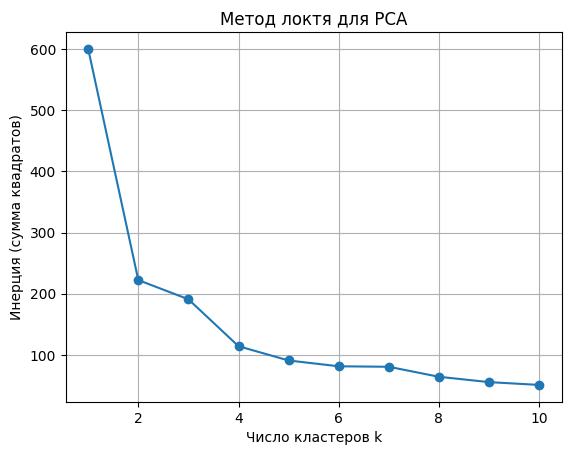

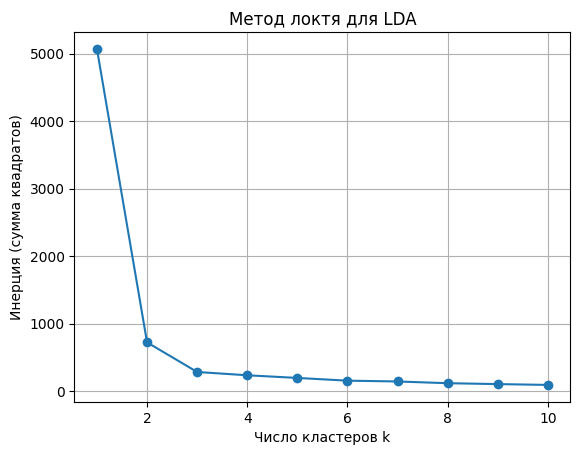

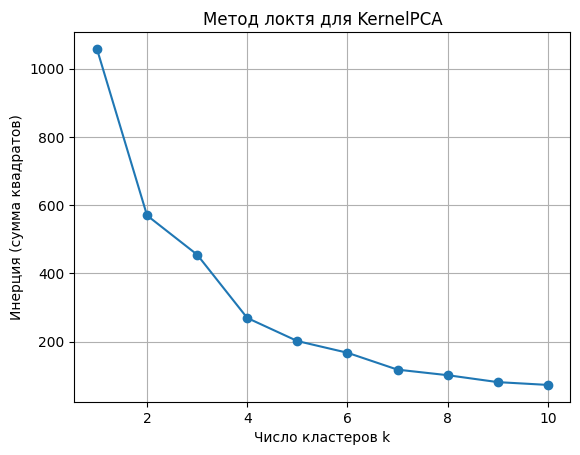

In [768]:
elbow_method(X_pca, title='PCA')
elbow_method(X_lda, title='LDA')
elbow_method(X_kpca, title='KernelPCA')

Метод локтя для PCA показывает явный "изгиб" на графике, что позволяет оптимально выбрать число кластеров (k). Для LDA и KernelPCA данные отсутствуют или неинформативны, что затрудняет анализ.

Только PCA предоставляет полезную информацию для выбора k. LDA и KernelPCA требуют дополнительных данных или настроек. Оптимальное k для PCA — в точке изгиба графика (вероятно, между 4-6).

*11. Повторите измерение метрики, но уже после разбиения выборки на тестовую и обучающую. Сравните долю объясненной дисперсии на тестовой выборке.*

In [769]:
from sklearn.model_selection import train_test_split

In [770]:
iris = load_iris()
X = iris.data
y = iris.target

In [771]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [772]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [773]:
# PCA на обучающей выборке
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# объяснённая дисперсия на train
explained_variance_train = np.sum(pca.explained_variance_ratio_)
print(f'Explained variance ratio на обучающей выборке: {explained_variance_train:.4f}')

Explained variance ratio на обучающей выборке: 0.9602


In [774]:
# PCA к тестовой выборке
X_test_pca = pca.transform(X_test_scaled)

# чтобы измерить explained variance на тестовой выборке, считаем
# дисперсию проекции по компонентам / общая дисперсия теста
total_variance_test = np.var(X_test_scaled, axis=0).sum()
explained_variance_test = np.var(X_test_pca, axis=0).sum()
explained_variance_ratio_test = explained_variance_test / total_variance_test

print(f'Explained variance ratio на тестовой выборке (оценка): {explained_variance_ratio_test:.4f}')


Explained variance ratio на тестовой выборке (оценка): 0.9519
